In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [2]:
# Load the raw data as a pandas DataFrame
trail_data = pd.read_csv('Alltrails_Top50.csv')

In [3]:
# Display the first 5 rows of the DataFrame
trail_data.head()

,name,location,difficulty,length,elevation,reviews,rating,route_type
0,Angels Landing Trail,Zion National Park,Hard,6.9,557,24041,4.9,Out and Back
1,Navajo Loop and Queens Garden Trail,Bryce Canyon National Park,Moderate,5.0,198,15818,4.9,Loop
2,Devil's Bridge Trail,Coconino National Forest,Moderate,6.3,159,23938,4.7,Out and Back
3,Emerald Lake Trail,Rocky Mountain National Park,Moderate,5.1,214,14549,4.8,Out and Back
4,Vernal and Nevada Falls via Mist Trail,Yosemite National Park,Hard,10.3,673,12978,4.9,Loop


## Data Exploration and Analysis

### Summary Statistics
To better understand the data, I first will review the summary statistics, specifically for the quantitative variables:

In [4]:
# Review the summary statistics for quantitative variables
summary_stats = trail_data.describe()

In [5]:
# Display the Summary Stats
summary_stats

,length,elevation,reviews,rating
count,50.000000,50.00000,50.000000,50.000000
mean,8.624000,491.40000,11775.580000,4.764000
std,4.578903,309.52663,3810.262903,0.080204
min,1.900000,155.00000,6031.000000,4.600000
25%,5.200000,253.75000,9431.750000,4.700000
50%,7.650000,446.50000,10986.000000,4.800000
75%,11.525000,642.75000,13041.750000,4.800000
max,26.600000,1617.00000,24041.000000,4.900000


The summary statistics provide information on the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values for the variables: length, elevation, reviews, and rating.

### Location Analysis
Next, I will examine the distribution of hiking trails across different locations. This will help me determine if certain parks are home to more 'Top 50' trails than the other parks.

In [6]:
# Count the number of trails per location
location_counts = trail_data['location'].value_counts()

# Display the location counts
location_counts

Coconino National Forest                        4
Yosemite National Park                          4
Zion National Park                              3
Arches National Park                            2
Red Rock-Secret Mountain Wilderness             2
Bryce Canyon National Park                      2
Great Smoky Mountains National Park             2
Mount Baker Snoquaimie National Forest          2
Rocky Mountain National Park                    2
Glacier National Park                           1
Rattlesnake Mountain Scenic Area                1
Tiger Mountain State Forest                     1
Roosevelt National Forest                       1
Okanogan-Wenatchee National Forest              1
Koko Crater Regional Park                       1
Uinta-Wasatch-Cache National Forest             1
Arapaho National Forest                         1
Mount Evans Wilderness                          1
Mount Si Natural Resources Conservation Area    1
Phoenix Mountain Preserve                       1


The `location_counts` variable stores the count of trails per location. Since most parks appear to have 1 trail in the Top 50 list, I will apply a filter to only include locations with > 1 trail.

In [7]:
# Filter locations with only 1 trail
filtered_location_counts = location_counts[location_counts != 1]

# Display filtered location counts
filtered_location_counts

Coconino National Forest                  4
Yosemite National Park                    4
Zion National Park                        3
Arches National Park                      2
Red Rock-Secret Mountain Wilderness       2
Bryce Canyon National Park                2
Great Smoky Mountains National Park       2
Mount Baker Snoquaimie National Forest    2
Rocky Mountain National Park              2
Name: location, dtype: int64

Here, `filtered_location_counts` represents the filtered counts, excluding locations with only one trail. These counts reveal the popularity and frequency of the parks with the highest rated trails.

### Difficulty Analysis

I will analyze the distribution of hiking trails based on their difficulty levels:

In [8]:
# Count the number of trails per difficulty level
difficulty_counts = trail_data['difficulty'].value_counts()

# Display the difficulty counts
difficulty_counts

Hard        27
Moderate    23
Name: difficulty, dtype: int64

The `difficulty_counts` variable contains the count of trails per difficulty level, providing insights into the prevalence of easy, moderate, and hard trails - interesting how not a single easy hike is in the top 50 list!

### Route Type Analysis

I will now explore the distribution of hiking trails by their route types:

In [9]:
# Count the number of trails per route type
route_type_counts = trail_data['route_type'].value_counts()

# Display the route type counts
route_type_counts

Out and Back    39
Loop            11
Name: route_type, dtype: int64

The `route_type_counts` variable stores the count of trails per route type, such as "Out and Back" or "Loop." This analysis helps understand the variety of trail types in the top 50 list.

## Data Visualization

### Difficulty Proportions

This pie chart illustrates the proportion of difficulty levels among the top 50 hiking trails. It provides a visual representation of the percentage comparison, making it easier to understand the distribution of moderate and hard trails within the dataset.

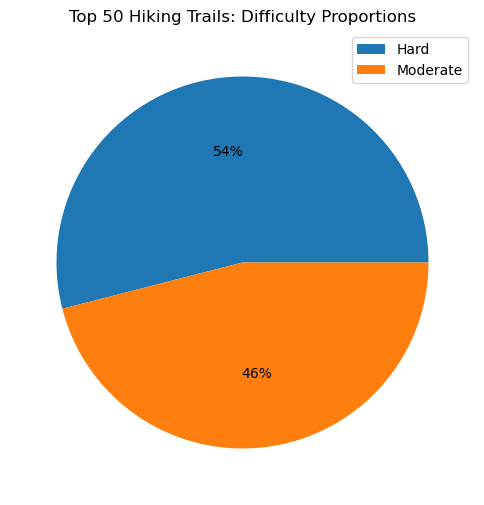

In [10]:
# Visualize the proportion of difficulty levels
plt.subplots(1, 1, figsize=(6, 10))
plt.pie(difficulty_counts, autopct='%1.0f%%')
plt.legend(labels=difficulty_counts.index)
plt.title("Top 50 Hiking Trails: Difficulty Proportions")
plt.show()

I find it interesting how there are no 'Easy' trails made it into the top 50 list.

### Frequency of Locations

For plotting the frequency of locations, I will be using a horizontal bar chart. This visually helps to identify the locations with the highest number of trails in the top 50 list.

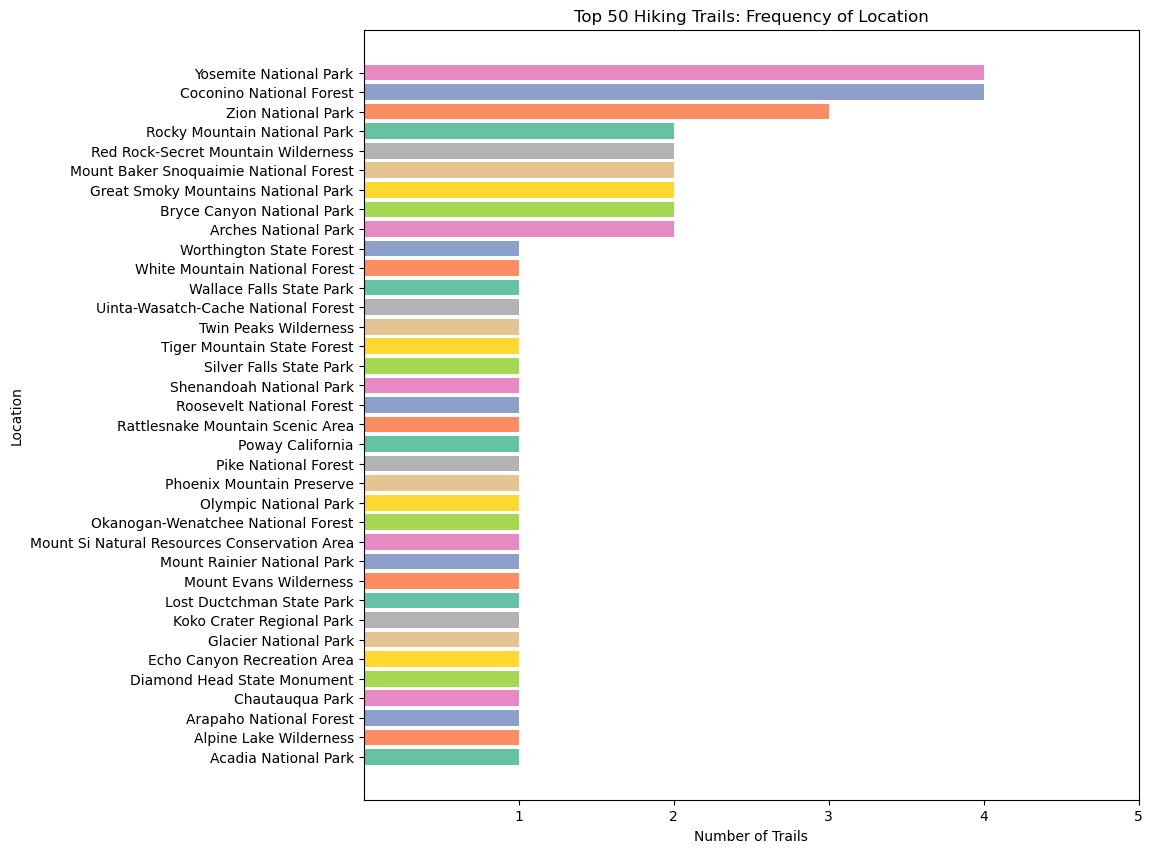

In [11]:
# Visualize the frequency of trails by location
colors_sns = sns.color_palette('Set2', n_colors=len(location_counts))
sorted_location_data = sorted(zip(location_counts, location_counts.index))
sorted_location_counts, sorted_locations = zip(*sorted_location_data)

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(sorted_locations, sorted_location_counts, color=colors_sns)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_title("Top 50 Hiking Trails: Frequency of Location")
ax.set_xlabel("Number of Trails")
ax.set_ylabel("Location")
plt.show()

**Yosemite National Park** and **Coconino National Forest** have the highest frequency of trails in the Alltrails Top 50 hikes (4 trails), followed by **Zion National Park** (3 trails).

### Comparison of Route Types

To plot the data for `route_type`, I will be using a standard bar chart. It provides insights into the popularity of route types among the top 50 hiking trails.

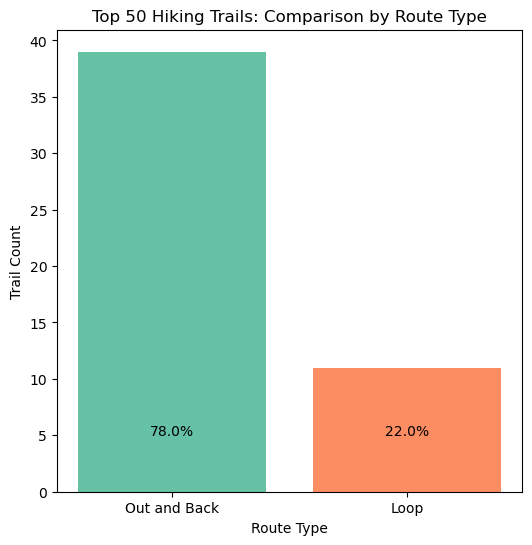

In [12]:
# Visualize the comparison of trail counts by route type
route_type_proportions = (route_type_counts / route_type_counts.sum()) * 100

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(route_type_counts.index, route_type_counts, color=colors_sns, label=route_type_counts.index)

for i, value in enumerate(route_type_proportions):
    ax.text(i, 5, str(value) + "%", ha='center')

ax.set_title("Top 50 Hiking Trails: Comparison by Route Type")
ax.set_ylabel("Trail Count")
ax.set_xlabel("Route Type")
plt.show()

To better understand the absolute values, the chart includes the relative percentage values for each difficulty level, allowing for a more relative comparison between the different levels.

### Trail Length Distribution

To illustrate the distribution of trail lengths, which is a quantitative variable, I will utilize a histogram. This graphical representation allows me to assess the spread of the entire dataset and observe its central tendency.

Additionally, I will incorporate the mean and median values in the plot to enhance the visual analysis.

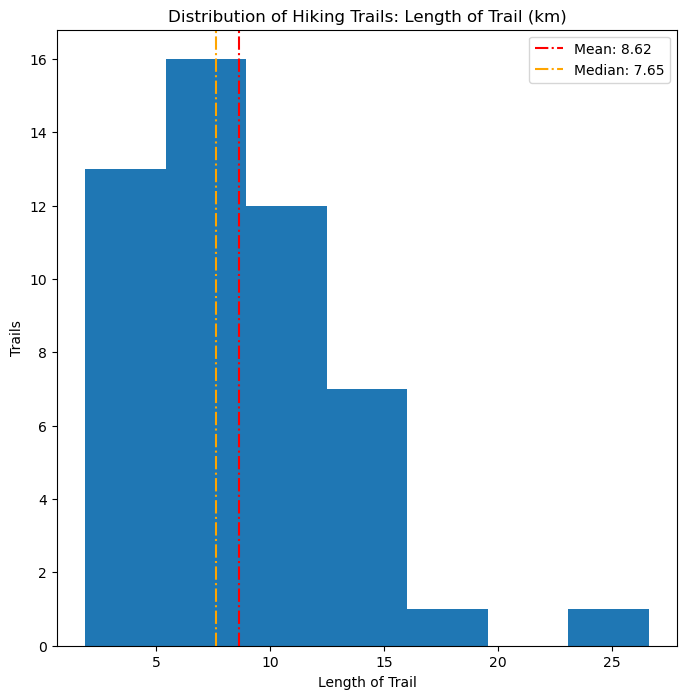

In [13]:
# Visualize the distribution of trail lengths
trail_lengths = trail_data['length']
mean_length = np.mean(trail_lengths).round(2)
median_length = np.median(trail_lengths).round(2)
legend = [f"Mean: {mean_length}", f"Median: {median_length}"]

fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(trail_lengths, bins=7)
ax.set_title("Distribution of Hiking Trails: Length of Trail (km)")
ax.set_xlabel("Length of Trail")
ax.set_ylabel("Trails")
ax.axvline(mean_length, color='red', linestyle='-.')
ax.axvline(median_length, color='orange', linestyle='-.')
ax.legend(legend)
plt.show()

The dissimilarity between the mean and median implies a slight rightward skew in the distribution of trail lengths, wherein a few longer trails elevate the overall average. The distribution seems to exhibit a prominent peak around 7km in distance. Notably, there is an exceptional outlier at 25km, indicating a highly favorable trail that happens to be much longer than the majority.

### Distribution of Elevation Gain

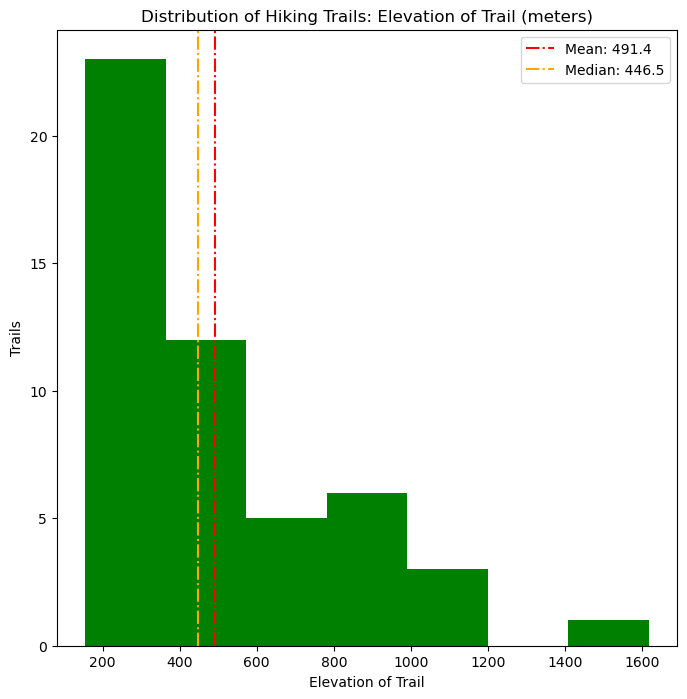

In [14]:
# Visualize the distribution of elevation gain
elevation_gain = trail_data['elevation']
mean_elevation = np.mean(elevation_gain).round(2)
median_elevation = np.median(elevation_gain).round(2)
legend = [f"Mean: {mean_elevation}", f"Median: {median_elevation}"]

fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(elevation_gain, color='green', bins=7)
ax.set_title("Distribution of Hiking Trails: Elevation of Trail (meters)")
ax.set_xlabel("Elevation of Trail")
ax.set_ylabel("Trails")
ax.axvline(mean_elevation, color='red', linestyle='-.')
ax.axvline(median_elevation, color='orange', linestyle='-.')
ax.legend(legend)
plt.show()

The elevation distribution of trails also exhibits a rightward skew. The mode, which is approximately 200 meters, represents the most frequently occurring value. Once again, the presence of an outlier seems to be influencing the mean to be greater than the median.

### Distribution of Trail Reviews

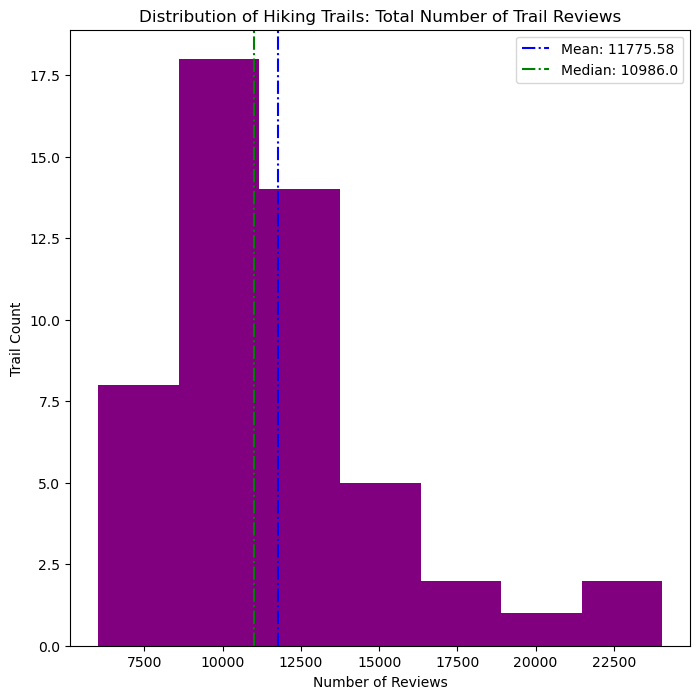

In [15]:
# Visualize the distribution of trail reviews
trail_reviews = trail_data['reviews']
mean_reviews = np.mean(trail_reviews).round(2)
median_reviews = np.median(trail_reviews).round(2)
legend = [f"Mean: {mean_reviews}", f"Median: {median_reviews}"]

fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(trail_reviews, color='purple', bins=7)
ax.set_title("Distribution of Hiking Trails: Total Number of Trail Reviews")
ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Trail Count")
ax.axvline(mean_reviews, color='blue', linestyle='-.')
ax.axvline(median_reviews, color='green', linestyle='-.')
ax.legend(legend)
plt.show()

### Distribution of Trail Ratings

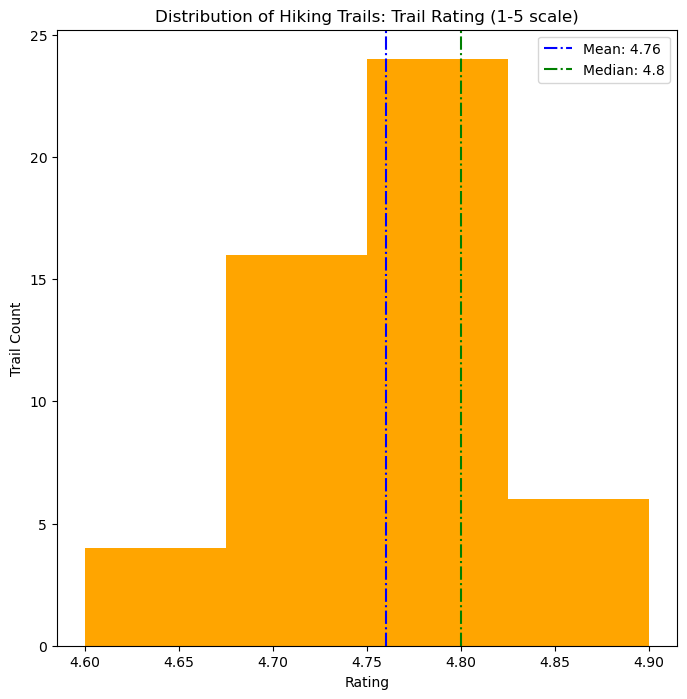

In [16]:
# Visualize the distribution of trail ratings
trail_ratings = trail_data['rating']
mean_rating = np.mean(trail_ratings).round(2)
median_rating = np.median(trail_ratings).round(2)
legend = [f"Mean: {mean_rating}", f"Median: {median_rating}"]

fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(trail_ratings, color='orange', bins=4)
ax.set_title("Distribution of Hiking Trails: Trail Rating (1-5 scale)")
ax.set_xlabel("Rating")
ax.set_ylabel("Trail Count")
ax.axvline(mean_rating, color='blue', linestyle='-.')
ax.axvline(median_rating, color='green', linestyle='-.')
ax.legend(legend)
plt.show()

### Trail Length vs. Trail Elevation

To plot the relationship between trail length and trail elevation I will use a scatterplot. Additionally, I will color-code the datapoints based on their difficulty level (blue for moderate, red for hard). 

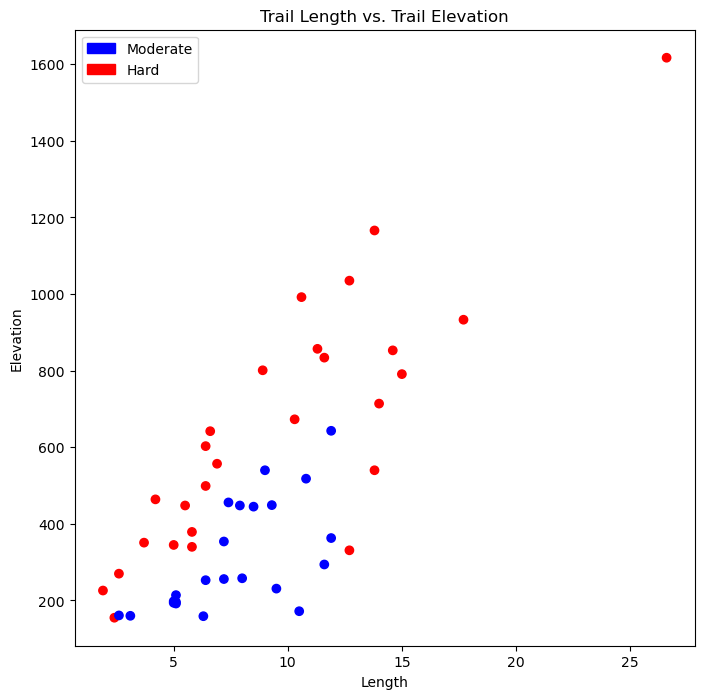

In [17]:
# Visualize the relationship between trail length and elevation, color-coded by difficulty
trail_length = trail_data['length']
trail_elevation = trail_data['elevation']
difficulty = trail_data['difficulty']

difficulty_colors = {
    'Moderate': 'blue',
    'Hard': 'red'
}

colors = [difficulty_colors[diff] for diff in difficulty]

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(trail_length, trail_elevation, c=colors)
ax.set_title("Trail Length vs. Trail Elevation")
ax.set_xlabel("Length")
ax.set_ylabel("Elevation")

# Create custom legend handles and labels
legend_handles = [patches.Patch(color=color, label=diff) for diff, color in difficulty_colors.items()]
ax.legend(handles=legend_handles)

plt.show()

The plot helps identify any patterns or trends between trail length and elevation, with respect to difficulty.

Based on the scatterplot, it appears that trail length and elevation are positively correlated, with longer trails generally having higher elevations. Additionally, a pattern emerges where hikes with higher difficulty ratings tend to exhibit greater elevation gain when compared to hikes of similar length. This pattern suggests that elevation likely plays a substantial role in determining the difficulty rating of hikes.

### Number of Reviews vs. Trail Length

I am curious about whether the number of reviews correlates with the length of a trail. Specifically, I wonder if longer trails, which typically require a greater time commitment, elicit a higher proportion of reviews.

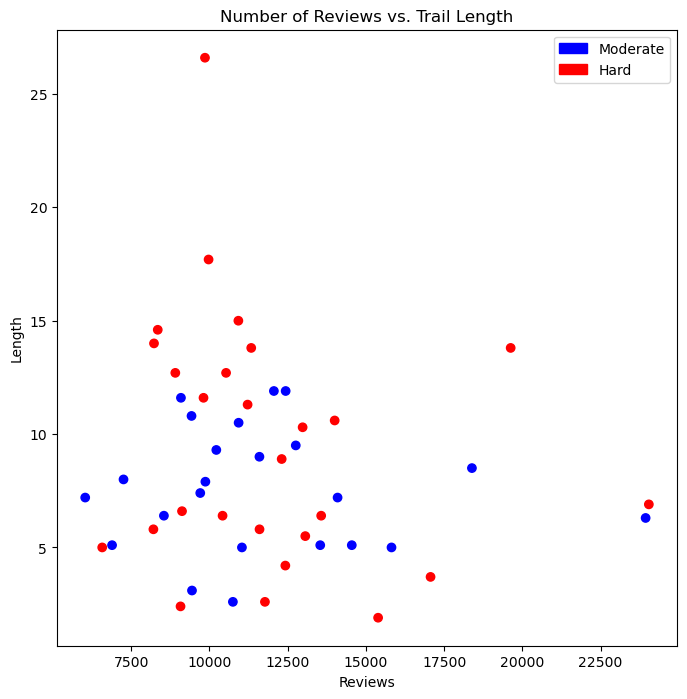

In [18]:
# Visualize the relationship between the number of reviews and trail length, color-coded by difficulty
trail_reviews = trail_data['reviews']

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(trail_reviews, trail_length, c=colors)
ax.set_title("Number of Reviews vs. Trail Length")
ax.set_xlabel("Reviews")
ax.set_ylabel("Length")

# Create custom legend handles and labels
legend_handles = [patches.Patch(color=color, label=diff) for diff, color in difficulty_colors.items()]
ax.legend(handles=legend_handles)

plt.show()

In contrast to the previous scatterplot depicting the relationship between trail length and elevation, this particular plot does not exhibit a discernible pattern. There seems to be an absence of any positive or negative correlation among the data points, regardless of the level of difficulty.

## Conclusion

To summarize, this analysis has proven to be a valuable exercise for my career in data analytics. It has enabled me to merge my enthusiasm for hiking with my passion for data analysis. As a result, I could delve deeper into understanding the popularity, difficulty levels, and geographical distribution of hiking trails, thereby providing valuable insights for outdoor enthusiasts and trail lovers. This analysis could prove instrumental in guiding the selection and planning of future hiking adventures and empower users or businesses such as AllTrails to make more informed, data-driven decisions.

The key findings from the analysis include:

- Difficulty: Among the top 50 hiking trails, the majority (27 trails) are categorized as 'Hard', closely followed by 'Moderate' trails (23 in total). Interestingly, no trails on the list are classified as 'Easy'.

- Location: The top 50 trails cover a diverse range of locations. Notably, both the Coconino National Forest and Yosemite National Park, each containing four trails, have the highest representation. Zion National Park follows closely with three trails.

- Route Type: 'Out and Back' stands out as the most common route type among the top 50 hiking trails, featuring in 39 trails. Conversely, the 'Loop' route type is less frequent, found in only 11 trails.

- Trail Length: The distribution of trail lengths exhibits a right-skew. The average trail length is 8.62 km, and the median stands at 7.65 km. This distribution suggests that a small number of longer trails contribute to the elevation of the mean value.

- Elevation Gain: Much like trail length, the distribution of elevation gains also demonstrates a right-skew, with a mode around 200 meters of elevation gain. The mean elevation gain is calculated to be 491.40 meters, whereas the median is slightly lower, at 446.50 meters. The presence of outliers in the dataset has significantly driven the mean to be higher than the median.

- Reviews: The dataset showcases a wide range of reviews and trail ratings. The average trail rating is a commendable 4.76 out of 5, which indicates high satisfaction levels, as would be expected among the top 50 trails.

- Ratings: The mean number of reviews stands at 11,775.58, with a minimum of 6,031 and a maximum of 24,041. This reflects the broad range and popularity of user engagement across the top 50 hiking trails.